<h1 style='text-align:center;border:10px double;border-color:gray;'>
    <br/>
     PROJET 4<br/>
    <br/>
    <font color = 'Navy'>"Anticipez les besoins en consommation de bâtiments"</font>
    <br/>
    <br/>
    
</h1>
<h4 style='text-align:left;border-color:gray;'>
    <br/>
    <font color = 'Navy'>* notebook de la prediction SEU</font>
    <br/>
</h4>

 Dirigé par :   [Pouria Forouzesh](https://www.linkedin.com/in/pouria-forouzesh/)

# Imports

In [1]:
from datetime import datetime

# Mesurer le temps d'exécution avant l'entraînement du modèle
start_time = datetime.now()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import set_config

In [4]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

C:\Users\pouri\AppData\Local\Temp\ipykernel_68404\339451792.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# I. Chargement jeu de données

In [5]:
data = pd.read_csv('data_final.csv')
df = data.copy()
print('Data shape = ', df.shape)
print('Data Nan = ', df.isna().sum().sum())


Data shape =  (1656, 19)
Data Nan =  0


In [6]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'BuildingAge', 'TotalGHGEmissionsLog', 'SiteEnergyUse(kBtu)Log'],
      dtype='object')

# II. Modeling et analyse la variable 'SiteEnergyUse(kBtu)'  à prédire

In [7]:
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)Log', 'TotalGHGEmissionsLog'], axis = 1)
y = df['SiteEnergyUse(kBtu)Log']
print(X.shape)
print(y.shape)

(1656, 15)
(1656,)


### Encoding et standardisation

In [8]:
X.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'BuildingAge'],
      dtype='object')

In [9]:
numeric_features = [feature for feature in X.columns if X[feature].dtypes != 'O' ] 
df_numeric = df[numeric_features]
df_numeric.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
0,7,47.61220,-122.33799,1.0,12,88434,0,60.0,81.699997,2003882.00,1276453.0,89
1,7,47.61317,-122.33393,1.0,11,103566,15064,61.0,94.800003,0.00,5145082.0,20
2,7,47.61393,-122.33810,1.0,41,956110,196718,43.0,96.000000,21566554.00,1493800.0,47
3,7,47.61412,-122.33664,1.0,10,61320,0,56.0,110.800003,2214446.25,1811213.0,90
4,7,47.61375,-122.34047,1.0,18,175580,62000,75.0,114.800003,0.00,8803998.0,36


In [10]:
categorical_features = [feature for feature in X.columns if X[feature].dtypes == 'O' ] 
df_categorical = df[categorical_features]
df_categorical.head()

,BuildingType,PrimaryPropertyType,Neighborhood
0,NonResidential,Hotel,DOWNTOWN
1,NonResidential,Hotel,DOWNTOWN
2,NonResidential,Hotel,DOWNTOWN
3,NonResidential,Hotel,DOWNTOWN
4,NonResidential,Hotel,DOWNTOWN


**Transformation les colonnes catégoriels avec OneHotEncoder()**

In [11]:
# Instancier l'encodeur OneHotEncoder
encoder = OneHotEncoder()

# Transformer la colonne "Couleur" en plusieurs colonnes binaires
encoded_data = encoder.fit_transform(df_categorical)

# Convertir le résultat en un dataframe Pandas
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names())

df_encoded.head()


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Distribution Center,x1_Hospital,x1_Hotel,x1_K-12 School,x1_Laboratory,x1_Large Office,x1_Medical Office,x1_Mixed Use Property,x1_Office,x1_Other,x1_Refrigerated Warehouse,x1_Residence Hall,x1_Restaurant,x1_Retail Store,x1_Self-Storage Facility,x1_Senior Care Community,x1_Small- and Mid-Sized Office,x1_Supermarket / Grocery Store,x1_University,x1_Warehouse,x1_Worship Facility,x2_BALLARD,x2_CENTRAL,x2_DELRIDGE,x2_DELRIDGE NEIGHBORHOODS,x2_DOWNTOWN,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,x2_NORTH,x2_NORTHEAST,x2_NORTHWEST,x2_SOUTHEAST,x2_SOUTHWEST
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**transformation les colonnes numériques avec StandardScaler()**

In [12]:
# Créer une instance de StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données
scaler.fit(df_numeric)

# Mettre à l'échelle les colonnes numériques
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric),
                         columns=df_numeric.columns)

# Afficher le nouveau dataframe
df_scaled.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
0,1.207179,-0.075333,-0.205224,-0.068583,1.287957,-0.101315,-0.305904,-0.239698,0.126268,0.269177,-0.075155,1.066002
1,1.207179,-0.055171,-0.040207,-0.068583,1.125516,-0.050302,0.049398,-0.201147,0.303252,-0.093270,0.336619,-1.043369
2,1.207179,-0.039374,-0.209695,-0.068583,5.998761,2.823811,4.333916,-0.895063,0.319464,3.807522,-0.052021,-0.217963
3,1.207179,-0.035424,-0.150354,-0.068583,0.963074,-0.192723,-0.305904,-0.393901,0.519415,0.307262,-0.018235,1.096572
4,1.207179,-0.043115,-0.306022,-0.068583,2.262606,0.192473,1.156437,0.338566,0.573456,-0.093270,0.726071,-0.554240


In [13]:
# Concaténer les dataframes 
df = pd.concat([df_scaled, df_encoded], axis=1)

print('data_encoded', df_encoded.shape)
print('df_scaled', df_scaled.shape)
print('data_encoded + df_scaled', df.shape)

data_encoded (1656, 40)
df_scaled (1656, 12)
data_encoded + df_scaled (1656, 52)


In [14]:
# Séparer les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (1324, 52)
Taille de l'ensemble de test : (332, 52)


In [15]:
models = {
    'Dummy Regressor' : DummyRegressor(strategy="median"),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(tol=0.5),
    'DecisionTree' : DecisionTreeRegressor(random_state=42),
    'ElasticNet' : ElasticNet(),
    'SVR': SVR(),
    'Ridge Kernel' : KernelRidge(),
    'RandomForestRegressor' : RandomForestRegressor(random_state=42),
    'XGBRegressor' : XGBRegressor()
}

In [16]:
results_model = []
#parametres = []
for model_name, model in models.items():
        
    # Fit models
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluer les performances du modèles avec les métriques
    print(f"Evaluer la performance {model_name}...")
    mae = mean_absolute_error(y_test, y_pred).round(3)
    mse = mean_squared_error(y_test, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(3)
    med_abs_err = median_absolute_error(y_test,y_pred).round(3)
    print("MAE = ", mae)        
    print("MSE = ", mse)
    print("RMSE = ",rmse)
    print("R² = ", r_score)
    print("median abs err = ", med_abs_err)
    print('-'*100)
    # Score model et  append model results dict avec valeurs
    results_model.append([model_name, mae, mse, rmse, r_score, med_abs_err])

Evaluer la performance Dummy Regressor...
MAE =  0.46
MSE =  0.338
RMSE =  0.581
R² =  -0.03
median abs err =  0.38
----------------------------------------------------------------------------------------------------
Evaluer la performance Ridge...
MAE =  0.228
MSE =  0.086
RMSE =  0.293
R² =  0.737
median abs err =  0.186
----------------------------------------------------------------------------------------------------
Evaluer la performance Lasso...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
----------------------------------------------------------------------------------------------------
Evaluer la performance DecisionTree...
MAE =  0.095
MSE =  0.02
RMSE =  0.141
R² =  0.938
median abs err =  0.067
----------------------------------------------------------------------------------------------------
Evaluer la performance ElasticNet...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
-----------------------------------

In [17]:
model_score_eval = pd.DataFrame(results_model,columns=['model', 'MAE', 'MSE', 'RMSE', 'R²', 'median abs err']).set_index('model')
model_score_eval

,MAE,MSE,RMSE,R²,median abs err
model,,,,,
Dummy Regressor,0.460,0.338,0.581,-0.030,0.380
Ridge,0.228,0.086,0.293,0.737,0.186
Lasso,0.458,0.328,0.573,-0.001,0.367
DecisionTree,0.095,0.020,0.141,0.938,0.067
ElasticNet,0.458,0.328,0.573,-0.001,0.367
SVR,0.133,0.031,0.176,0.904,0.108
Ridge Kernel,0.230,0.090,0.300,0.726,0.193
RandomForestRegressor,0.065,0.012,0.110,0.964,0.040
XGBRegressor,0.067,0.011,0.105,0.966,0.045


## Recherche des hyperparamètres avec GridSearchCV

**Modèle Baseline : Régression linéaire multivariée**

On crée un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une régression linéaire multivariée.

In [18]:
results_gridSearch = []

parameters_MLR = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False]
}

MLR_gridSearch = GridSearchCV(LinearRegression(), parameters_MLR, cv=5, n_jobs = 5)

MLR_gridSearch.fit(X_train, y_train) #.values.ravel()
y_pred_MLR = MLR_gridSearch.predict(X_test)

print('Best score et params LinearRegression')
print ("best score: ", MLR_gridSearch.best_score_)
print("best params: ",MLR_gridSearch.best_params_)
print('mean_fit_time :', MLR_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', MLR_gridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , MLR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',MLR_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction LinearRegression:")
mae = mean_absolute_error(y_test,y_pred_MLR).round(3)
mse = mean_squared_error(y_test,y_pred_MLR).round(3)
r_score = r2_score(y_test, y_pred_MLR, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_MLR)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_MLR).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['LinearRegression',
                          MLR_gridSearch.best_score_,
                          MLR_gridSearch.best_params_,
                          MLR_gridSearch.cv_results_['mean_test_score'],
                          MLR_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


Best score et params LinearRegression
best score:  0.23967896077467038
best params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}
mean_fit_time : [0.0186502  0.00933385 0.00872307 0.00564933 0.00961542 0.00672984
 0.00912795 0.00545955 0.0092567  0.00522714 0.00851974 0.00467372
 0.00834422 0.00558181 0.00833325 0.00512371 0.00962572 0.00521507
 0.00871992 0.00451684 0.01043072 0.0058197  0.00872078 0.00523071
 0.00872931 0.00521555 0.00842323 0.00491753 0.00889683 0.00488095
 0.00852771 0.00461597]
mean_score_time : [0.0023066  0.00230894 0.00210228 0.00219393 0.00250707 0.00200548
 0.00190172 0.00183539 0.00210986 0.00180511 0.00220809 0.00230422
 0.00190172 0.00190454 0.00240388 0.00210423 0.00201225 0.00180783
 0.00241265 0.00210643 0.00180125 0.002104   0.00191112 0.00249805
 0.00220432 0.0021018  0.00211577 0.0019136  0.00247583 0.00208111
 0.00230412 0.00190697]
mean_test_score : [ 2.04636010e-01 -6.60886298e+20  2.01709216e-01  2.3

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


**Hyperparamètres pour le modèle Ridge**

In [19]:
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
parameters_Ridge = {
    'alpha': [0.1, 1, 10],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky'],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1]
}

Ridge_gridSearch = GridSearchCV(Ridge(),parameters_Ridge, cv=5, n_jobs = 5)

Ridge_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_Ridge = Ridge_gridSearch.predict(X_test)

print('Best score et params Ridge')
print ("best score: ", Ridge_gridSearch.best_score_)
print("best params: ",Ridge_gridSearch.best_params_)
print('mean_fit_time :', Ridge_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', Ridge_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :',Ridge_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction Ridge:")
mae = mean_absolute_error(y_test,y_pred_Ridge).round(3)
mse = mean_squared_error(y_test,y_pred_Ridge).round(3)
r_score = r2_score(y_test, y_pred_Ridge, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_Ridge)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_Ridge).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['Ridge',
                          Ridge_gridSearch.best_score_,
                          Ridge_gridSearch.best_params_,
                          Ridge_gridSearch.cv_results_['mean_test_score'],
                          Ridge_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])

Best score et params Ridge
best score:  0.5102932060686654
best params:  {'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'normalize': True, 'solver': 'auto', 'tol': 0.001}
mean_fit_time : [0.00611157 0.00522356 0.0061182  0.00611734 0.00691357 0.00752831
 0.00577979 0.00643997 0.00628204 0.00386529 0.0053215  0.00522046
 0.00713649 0.00511847 0.00537724 0.0038136  0.00356817 0.00390582
 0.00430498 0.00441356 0.00456839 0.00551157 0.00570979 0.00611677
 0.00431218 0.00350604 0.00411949 0.00291018 0.00250745 0.00360484
 0.00361018 0.00441155 0.00492125 0.00321851 0.00340886 0.00311809
 0.0043077  0.00350676 0.0041039  0.00601544 0.00631576 0.00601559
 0.00421648 0.00440774 0.00412016 0.00260506 0.00320511 0.0036098
 0.00461664 0.00401306 0.00471711 0.00331588 0.00370502 0.00331278
 0.00300536 0.00420837 0.00361094 0.00491762 0.0046133  0.0051218
 0.00361156 0.00270729 0.00341392 0.00340714 0.0033154  0.00310469
 0.00521798 0.00561152 0.00511823 0.00280852 0.0030036  0.00280428
 0.00

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


**Hyperparamètres pour le modèle Lasso**

In [20]:
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
parameters_Lasso = {
    'alpha': [0.1, 1, 10],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1],
    'selection': ['cyclic', 'random']
}
Lasso_gridSearch = GridSearchCV(Lasso(tol=0.5),parameters_Lasso, cv=5, n_jobs = 5)
Lasso_gridSearch.fit(X_train, y_train)
y_pred_Lasso = Lasso_gridSearch.predict(X_test)
print('Best score et params Lasso')
print ("best score: ", Lasso_gridSearch.best_score_)
print("best params: ",Lasso_gridSearch.best_params_)
print('mean_fit_time :', Lasso_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', Lasso_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :',Lasso_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction Lasso:")
mae = mean_absolute_error(y_test,y_pred_Lasso).round(3)
mse = mean_squared_error(y_test,y_pred_Lasso).round(3)
r_score = r2_score(y_test, y_pred_Lasso, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_Lasso)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_Lasso).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['Lasso',
                          Lasso_gridSearch.best_score_,
                          Lasso_gridSearch.best_params_,
                          Lasso_gridSearch.cv_results_['mean_test_score'],
                          Lasso_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])

Best score et params Lasso
best score:  0.4305489641368763
best params:  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'selection': 'random', 'tol': 0.01}
mean_fit_time : [0.00561295 0.00468383 0.00531874 0.00551686 0.00491414 0.00710688
 0.00415521 0.00515256 0.00622187 0.00472784 0.00432544 0.00502095
 0.00528941 0.00478392 0.00489287 0.00431428 0.00410967 0.0045145
 0.00353241 0.00300322 0.00328832 0.00341182 0.00271454 0.00401297
 0.00364056 0.00417295 0.00413013 0.0040205  0.00381551 0.00353079
 0.0030272  0.00341177 0.00355239 0.00330997 0.00340738 0.00311027
 0.00342436 0.00361438 0.00381217 0.00423484 0.00345235 0.00361066
 0.00351    0.00386276 0.00300722 0.00332847 0.00321164 0.00320148
 0.00360775 0.00321121 0.00350704 0.00327973 0.0039175  0.00371194
 0.00318012 0.00291119 0.00320196 0.00361485 0.00422893 0.00310507
 0.00429168 0.00338387 0.00381546 0.00416818 0.00371122 0.00350919
 0.0031076  0.00310969 0.00406814 0.00340996 0.00361414 0.003210

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


**Hyperparamètres pour le modèle ElasticNet**

In [21]:
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
l1_ratio = np.logspace(-5, 1, n_alphas)
parameters_eNet = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1],
    'selection': ['cyclic', 'random']
}


eNet_gridSearch = GridSearchCV(ElasticNet(max_iter=10000,tol=100),parameters_eNet, cv=5, n_jobs = 5)
eNet_gridSearch.fit(X_train, y_train)
y_pred_eNet = eNet_gridSearch.predict(X_test)

print('Best score et params ElasticNet')
print ("best score: ", eNet_gridSearch.best_score_)
print("best params: ",eNet_gridSearch.best_params_)
print('mean_fit_time :', eNet_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', eNet_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :',eNet_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction ElasticNet:")
mae = mean_absolute_error(y_test,y_pred_eNet).round(3)
mse = mean_squared_error(y_test,y_pred_eNet).round(3)
r_score = r2_score(y_test, y_pred_eNet, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_eNet)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_eNet).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['ElasticNet',
                          eNet_gridSearch.best_score_,
                          eNet_gridSearch.best_params_,
                          eNet_gridSearch.cv_results_['mean_test_score'],
                          eNet_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


Best score et params ElasticNet
best score:  0.5083162364273346
best params:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'tol': 0.1}
mean_fit_time : [0.01124268 0.01395245 0.00732193 0.00811973 0.00641685 0.00651388
 0.00748167 0.00621104 0.00541787 0.00579734 0.00511332 0.00385833
 0.00476785 0.00418081 0.00429683 0.00392237 0.00361519 0.00449853
 0.0035223  0.00332608 0.00309711 0.00341034 0.00290327 0.00312715
 0.00440888 0.00473595 0.00432177 0.00370293 0.00440674 0.00370617
 0.00392642 0.00342822 0.00376225 0.00370431 0.00296259 0.00364494
 0.00440946 0.0037571  0.00401282 0.00401211 0.00365777 0.00350933
 0.00391006 0.00416627 0.00334539 0.0037107  0.00321074 0.00351195
 0.00471621 0.00442905 0.00401196 0.00421019 0.00412598 0.0043138
 0.00381665 0.0029047  0.00300918 0.0038166  0.00377812 0.00371256
 0.00420604 0.00381026 0.00439029 0.00471277 0.00359502 0.00391827
 0.00330887 0.0026083  0.00330372 0.00360

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


**Hyperparamètres pour le modèle decision tree**

In [22]:
parameters_DTR = {'criterion': ['mse', 'friedman_mse', 'mae'],
                 'splitter': ['best', 'random'],
                 'max_depth': [2, 4, 6, 8, 10, 12],
                 'min_samples_split': [2, 5, 10, 15],
                 'min_samples_leaf': [1, 2, 5, 10],
                 'max_features': ['auto', 'sqrt', 'log2']}

DTR_gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters_DTR, cv=5, n_jobs = 5)

DTR_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_DTR = DTR_gridSearch.predict(X_test)

print('Best score et params DecisionTree')
print ("best score: ", DTR_gridSearch.best_score_)
print("best params: ",DTR_gridSearch.best_params_)
print('mean_fit_time :', DTR_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', DTR_gridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , DTR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',DTR_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction DecisionTree:")
mae = mean_absolute_error(y_test,y_pred_DTR).round(3)
mse = mean_squared_error(y_test,y_pred_DTR).round(3)
r_score = r2_score(y_test, y_pred_DTR, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_DTR)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_DTR).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['DecisionTree',
                          DTR_gridSearch.best_score_,
                          DTR_gridSearch.best_params_,
                          DTR_gridSearch.cv_results_['mean_test_score'],
                          DTR_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\pouri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


Best score et params DecisionTree
best score:  0.9124820382884702
best params:  {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
mean_fit_time : [0.01858964 0.01253672 0.0140666  ... 0.05775704 0.06260891 0.05489187]
mean_score_time : [0.00748105 0.00569658 0.00562639 ... 0.00442815 0.00363297 0.00483541]
mean_test_score : [0.57494267 0.24417457 0.57494267 ... 0.27439733 0.53389866 0.27439733]
--------------------------------------------------
score de la prédiction DecisionTree:
MAE =  0.094
MSE =  0.02
RMSE =  0.14
R² =  0.94
median abs err =  0.066


**Hyperparamètres pour le modèle random forest**

In [23]:
# Recherche de la meilleure configuration d'hyperparamètre
parameters_RFR = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}

RFR_gridSearch = GridSearchCV(RandomForestRegressor(), parameters_RFR, cv=5, n_jobs = 5)

RFR_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_RFR = RFR_gridSearch.predict(X_test)

print('Best score et params RandomForestRegressor')
print ("best score: ", RFR_gridSearch.best_score_)
print("best params: ",RFR_gridSearch.best_params_)
print('mean_fit_time :', RFR_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', RFR_gridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , RFR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',RFR_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:")
mae = mean_absolute_error(y_test,y_pred_RFR).round(3)
mse = mean_squared_error(y_test,y_pred_RFR).round(3)
r_score = r2_score(y_test, y_pred_RFR, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_RFR)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_RFR).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['RandomForestRegressor',
                          RFR_gridSearch.best_score_,
                          RFR_gridSearch.best_params_,
                          RFR_gridSearch.cv_results_['mean_test_score'],
                          RFR_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])



C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best score et params RandomForestRegressor
best score:  0.9239030437916937
best params:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
mean_fit_time : [2.10778332 4.25947008 6.37049255 1.76290002 3.48730063 5.30736718
 1.50868106 3.08863001 4.61905656 1.73627057 3.45005817 5.21945562
 1.67940555 3.35132627 4.94172368 1.48224363 2.980863   4.50186701
 1.47726207 2.93948698 4.57410011 1.47851744 2.92038898 4.35074549
 1.41486726 2.80426531 4.19497728 0.83022575 1.64130492 2.48522258
 0.69979582 1.40237088 2.02675037 0.6236515  1.21382713 1.82306986
 0.64154344 1.27919464 1.93006225 0.63975368 1.27651157 1.88536124
 0.59194784 1.2017705  1.75484815 0.57253709 1.1251555  1.61939964
 0.53615189 1.08141317 1.55522213 0.51841102 0.96068087 1.46373
 0.73313127 1.48551178 2.31781702 0.70270371 1.15807915 1.73072453
 0.56340103 1.09171381 1.59274173 0.57225418 1.1936605  1.6591311
 0.55957618 1.09263759 1.73438449 0.54287105 1.07348

**Hyperparamètres pour le modèle xgboost**

In [24]:
parameters_XGB= {'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [3, 5, 7, 10],
                  'n_estimators': [100, 200, 300],
                  'min_child_weight': [1, 3, 5],
                  'gamma': [0, 0.1, 0.5, 1]}

XGB_GridSearch = GridSearchCV(XGBRegressor(),parameters_XGB, cv=5, n_jobs = 5)
XGB_GridSearch.fit(X_train, y_train)
y_pred_XGB = XGB_GridSearch.predict(X_test)
           

mae = mean_absolute_error(y_test,y_pred_XGB).round(3)
mse = mean_squared_error(y_test,y_pred_XGB).round(3)
r_score = r2_score(y_test, y_pred_XGB, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_XGB)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_XGB).round(3)
print('Best score et params XGBRegressor ')
print ("best score: ", XGB_GridSearch.best_score_)
print("best params: ",XGB_GridSearch.best_params_)
print('mean_fit_time :', XGB_GridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', XGB_GridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , XGB_GridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',XGB_GridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:"),
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['XGBRegressor',
                          XGB_GridSearch.best_score_,
                          XGB_GridSearch.best_params_,
                          XGB_GridSearch.cv_results_['mean_test_score'],
                          XGB_GridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err ])


Best score et params XGBRegressor 
best score:  0.9542248124748944
best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
mean_fit_time : [0.62106261 1.21028647 1.75959749 0.63794098 1.20133314 1.88030162
 0.65950599 1.22847795 1.78488493 0.93741455 1.76990385 2.66153855
 0.70628114 1.67459545 2.61945996 0.78434992 1.66034317 2.54163475
 0.81522446 1.92556581 2.92044673 0.7571588  1.81864119 3.0076941
 0.72250481 1.46471272 2.67963052 0.30124717 0.68167906 1.59656959
 0.7080626  1.01258469 2.28688517 0.64676838 1.47290139 2.91691647
 0.63119082 1.2645175  1.80203795 0.59010777 1.18980107 1.75295029
 0.61035151 1.23370562 1.57367315 0.36308227 0.66896443 1.35171571
 0.92084537 1.35258603 2.06717448 0.76427393 1.71185575 2.70779176
 1.15587482 2.47399297 3.91340957 1.23808465 2.49319863 3.62418351
 1.27089124 2.58195567 3.73870387 1.47026691 3.40963445 4.74375358
 1.65514722 3.50398741 5.3156764  1.65547829 3.52134185 5.25701332
 0.69

In [25]:
Model_result_gridSearch = pd.DataFrame(results_gridSearch,columns=['model', 'best_score', 'best_params','mean_test_score','mean_score_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
Model_result_gridSearch.drop(['mean_test_score', 'mean_score_time'], axis = 1, inplace=True )
Model_result_gridSearch

,model,best_score,best_params,MAE,MSE,RMSE,R²,median abs err
0,LinearRegression,0.239679,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}",0.229,0.087,0.294,0.736,0.187
1,Ridge,0.510293,"{'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'normalize': True, 'solver': 'auto', 'tol': 0.001}",0.270,0.121,0.348,0.632,0.229
2,Lasso,0.430549,"{'alpha': 0.1, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'selection': 'random', 'tol': 0.01}",0.321,0.162,0.402,0.506,0.262
3,ElasticNet,0.508316,"{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'tol': 0.1}",0.274,0.122,0.349,0.629,0.230
4,DecisionTree,0.912482,"{'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}",0.094,0.020,0.140,0.940,0.066
5,RandomForestRegressor,0.923903,"{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}",0.066,0.012,0.109,0.964,0.040
6,XGBRegressor,0.954225,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}",0.062,0.010,0.100,0.969,0.039


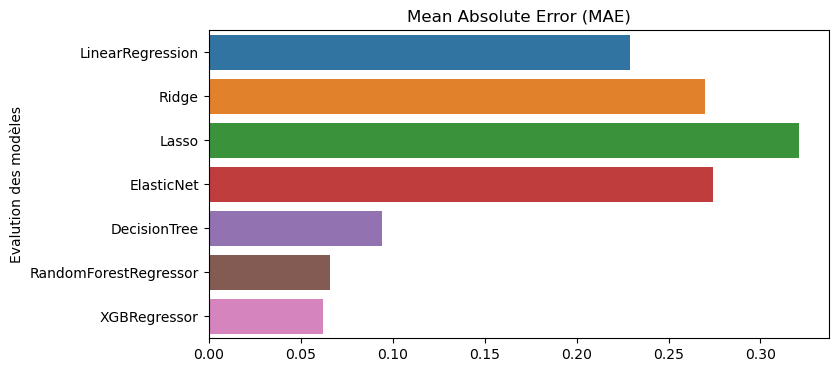

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Mean Absolute Error (MAE)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['MAE'].values.flatten(),
                 data=Model_result_gridSearch)


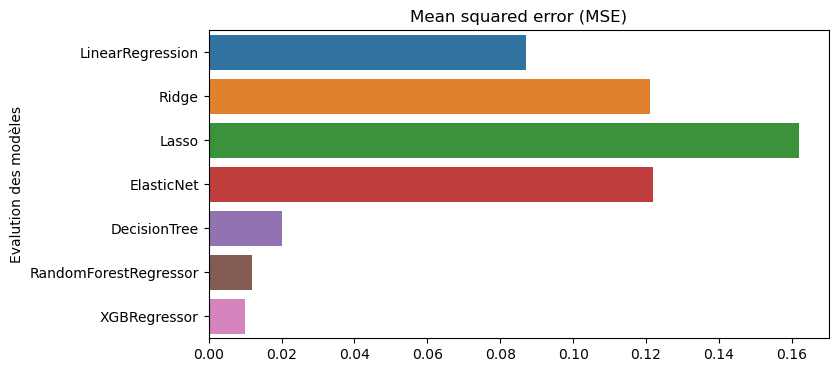

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Mean squared error (MSE)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['MSE'].values.flatten(),
                 data=Model_result_gridSearch)

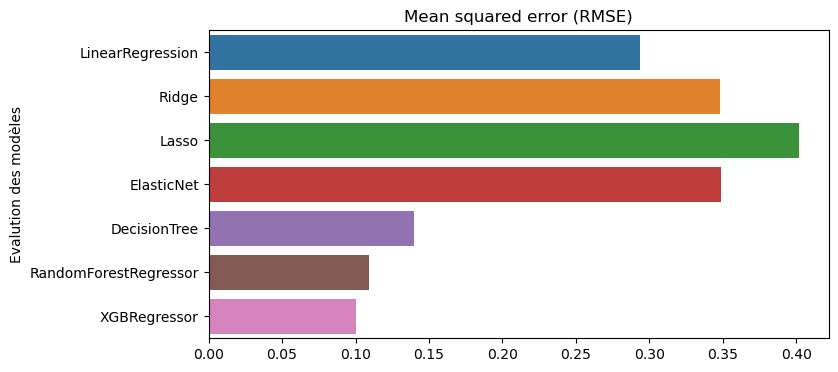

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Mean squared error (RMSE)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['RMSE'].values.flatten(),
                 data=Model_result_gridSearch)

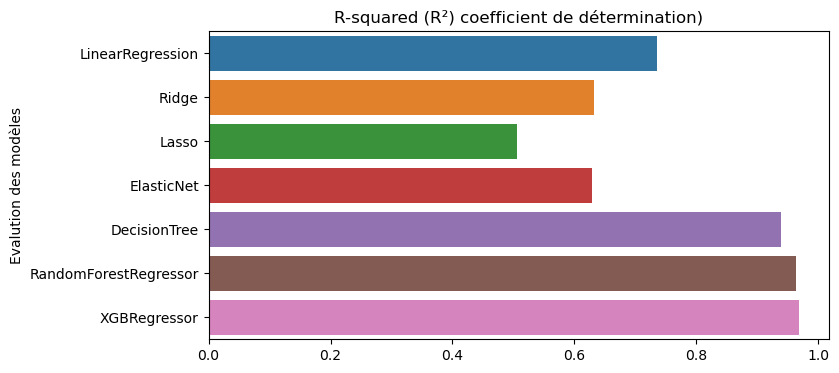

In [29]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("R-squared (R²) coefficient de détermination)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['R²'].values.flatten(),
                 data=Model_result_gridSearch)

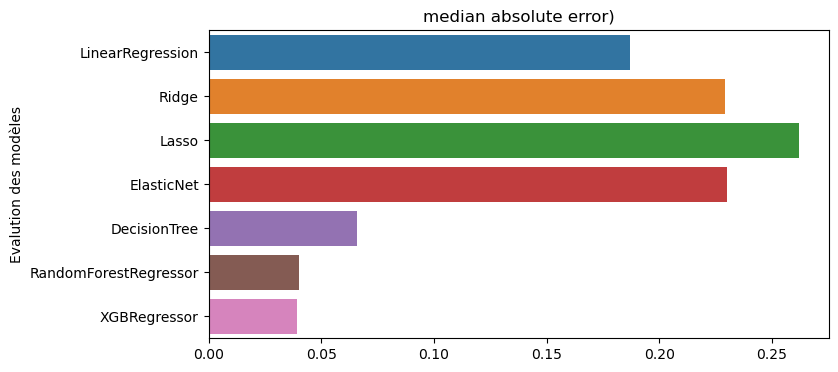

In [30]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("median absolute error)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['median abs err'].values.flatten(),
                 data=Model_result_gridSearch)


### Comparer les models avec best params

**RandomForestRegressor**

best params:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}



In [31]:
RFR_result_gridSearch_best = []

parameters_RFR_best = {'n_estimators': [100],
                 'max_depth': [None],
                 'min_samples_split': [5],
                 'min_samples_leaf': [1],
                 'max_features': ['auto']}

RFR_gridSearch_best = GridSearchCV(RandomForestRegressor(), parameters_RFR_best, cv=5, n_jobs = 5)

RFR_gridSearch_best.fit(X_train, y_train.values.ravel())
y_pred_best = RFR_gridSearch_best.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_best).round(3)
mse = mean_squared_error(y_test,y_pred_best).round(3)
r_score = r2_score(y_test, y_pred_best, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_best)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_best).round(3)

RFR_result_gridSearch_best.append(['RandomForestRegressor',
                          RFR_gridSearch_best.best_score_.round(3),
                          RFR_gridSearch_best.cv_results_['mean_test_score'].round(3),
                          #RFR_gridSearch_best.cv_results_['mean_train_score'].round(3),
                          RFR_gridSearch_best.cv_results_['mean_score_time'].round(3),
                          RFR_gridSearch_best.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err])

RFR_best_result_gridSearch = pd.DataFrame(RFR_result_gridSearch_best,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
RFR_best_result_gridSearch

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,RandomForestRegressor,0.918,[0.918],[0.014],[0.738],0.064,0.012,0.108,0.964,0.04


**XGBRegressor**

best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}



In [32]:
XGB_result_gridSearch_best = []

parameters_XGB_best= {'learning_rate': [0.1],
                  'max_depth': [3],
                  'n_estimators': [300],
                  'min_child_weight': [5],
                  'gamma': [0]}


XGB_GridSearch_best = GridSearchCV(XGBRegressor(),parameters_XGB_best, cv=5, n_jobs = 5)
XGB_GridSearch_best.fit(X_train, y_train)
y_pred_best = XGB_GridSearch_best.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_best).round(3)
mse = mean_squared_error(y_test,y_pred_best).round(3)
r_score = r2_score(y_test, y_pred_best, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_best)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_best).round(3)
 
XGB_result_gridSearch_best.append(['XGBRegressor',
                          XGB_GridSearch_best.best_score_.round(3),
                          XGB_GridSearch_best.cv_results_['mean_test_score'].round(3),
                          XGB_GridSearch_best.cv_results_['mean_score_time'].round(3),
                          XGB_GridSearch_best.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err ])

XGB_best_result_gridSearch = pd.DataFrame(XGB_result_gridSearch_best,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
XGB_best_result_gridSearch

,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,XGBRegressor,0.954,[0.954],[0.005],[0.774],0.062,0.01,0.1,0.969,0.039


In [33]:
best_result_gridSearch= pd.concat([RFR_best_result_gridSearch,XGB_best_result_gridSearch], join="outer",ignore_index=True,
                                            verify_integrity=True)
best_result_gridSearch

,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,RandomForestRegressor,0.918,[0.918],[0.014],[0.738],0.064,0.012,0.108,0.964,0.040
1,XGBRegressor,0.954,[0.954],[0.005],[0.774],0.062,0.010,0.100,0.969,0.039


### Test des modèles sélectionnés avec des best parameters et les métriques de scoring (R2, MAE,RMSE)¶

In [34]:
# Fonction d'évaluation des modèles de régression
def model_regression_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("MAE: ",mae.round(5))
    print("RMSE: ", rmse)
    print("R²: ", r_score.round(5))

In [35]:
final_model_RFR = RFR_gridSearch_best.best_estimator_
final_model_XGB = XGB_GridSearch_best.best_estimator_

final_prediction_RFR = final_model_RFR.predict(X_test)
final_prediction_XGB = final_model_XGB.predict(X_test)
print('final model RandomForest')
model_regression_metrics(np.array(y_test), final_prediction_RFR)
print('-'*50)
print('final model XGBOOST')
model_regression_metrics(np.array(y_test), final_prediction_XGB)

final model RandomForest
MAE:  0.06447
RMSE:  0.1
R²:  0.96438
--------------------------------------------------
final model XGBOOST
MAE:  0.06227
RMSE:  0.1
R²:  0.96929


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


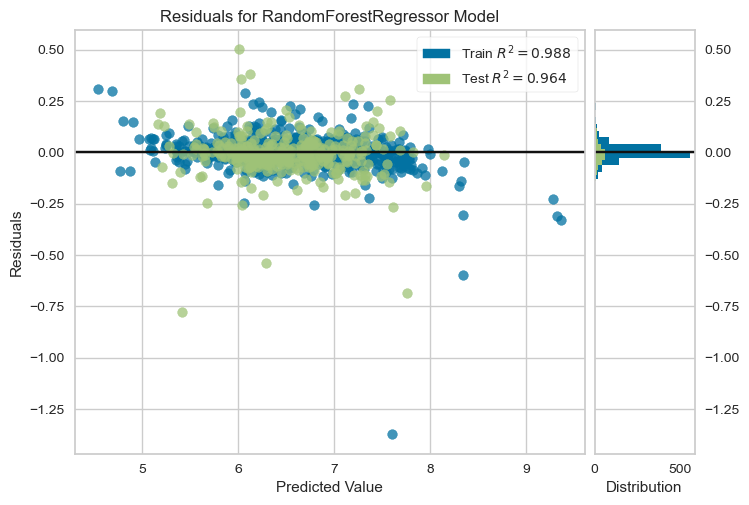

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = ResidualsPlot(final_model_RFR)
visualizer.fit(X_train, np.array(y_train).reshape(1324 ,)) 
visualizer.score(X_test, y_test)        
visualizer.show()            


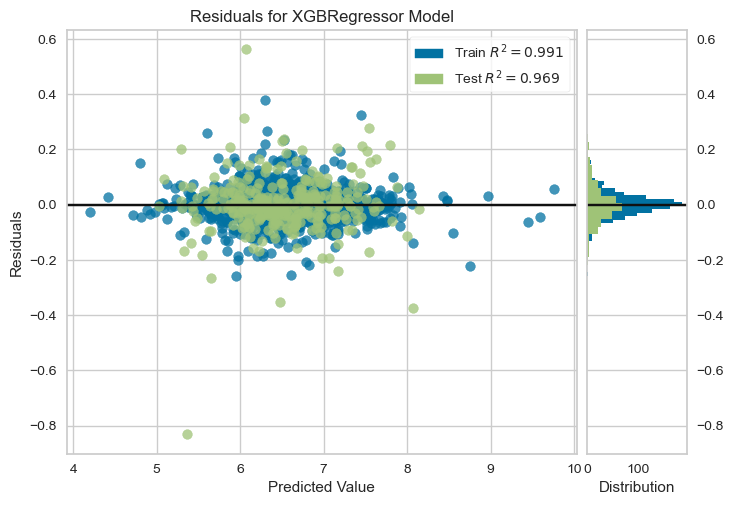

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
visualizer = ResidualsPlot(final_model_XGB)
visualizer.fit(X_train, np.array(y_train).reshape(1324,)) 
visualizer.score(X_test, y_test)        
visualizer.show() 

### Affichage des valeurs prédites vs valeurs réélles pour SiteEnergyUse(kBtu)

Nous allons vérifier la distribution des valaurs prédites en fonction des valeurs réélles :

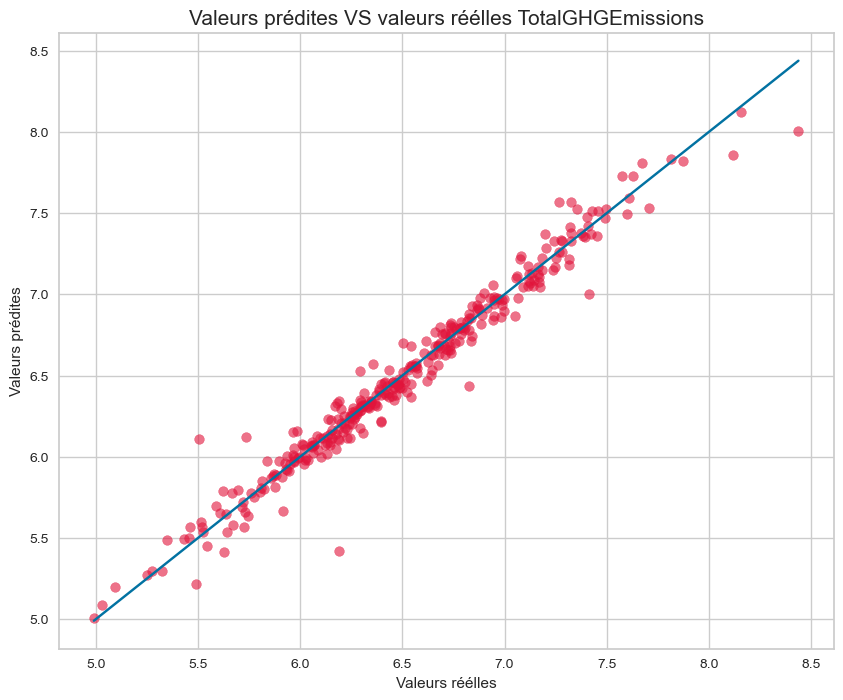

In [38]:
X_plot = [y_test.min(), y_test.max()]
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, color="#e1143b", alpha=.6)
plt.plot(X_plot, X_plot)
plt.xlabel("Valeurs réélles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs prédites VS valeurs réélles TotalGHGEmissions", fontsize=15)
plt.show()

### la feature importance

L'importance de la fonctionnalité (importance variable) décrit les fonctionnalités pertinentes. Cela peut aider à mieux comprendre le problème résolu et parfois conduire à des améliorations du modèle en utilisant la sélection de fonctionnalités. je présenterai une façon de calculer l'importance des fonctionnalités pour l'algorithme Random Forest.

- Fonctionnalité Importance intégrée à l'algorithme xgboost




[15:28:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.



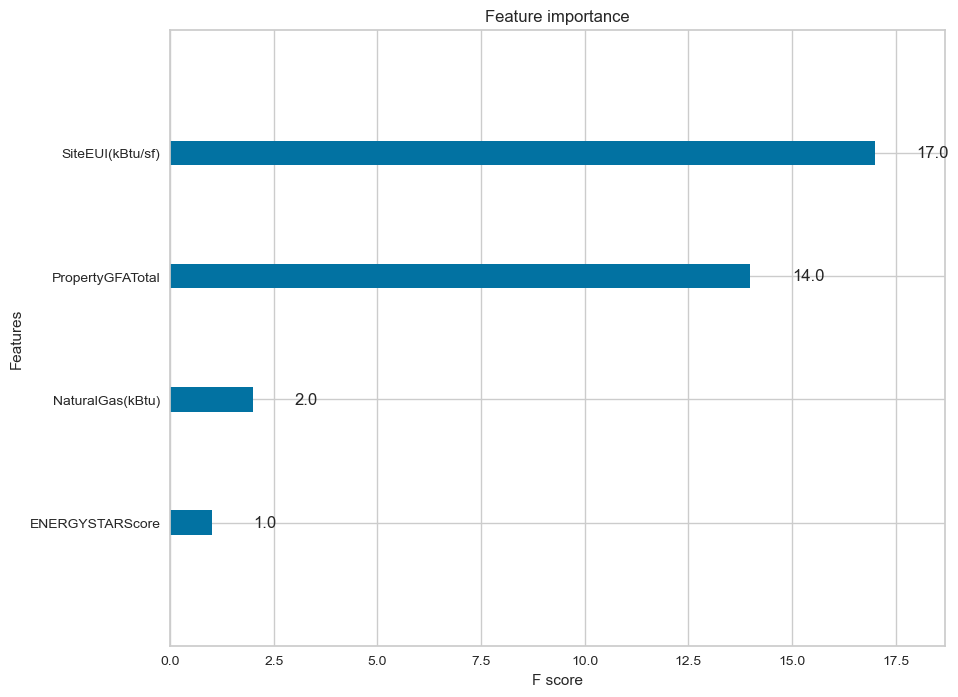

In [39]:
import xgboost as xgb
import matplotlib.pyplot as plt

# créer un DMatrix de xgboost pour les données d'entraînement
dtrain = xgb.DMatrix(X_train, label=y_train)

# entraîner un modèle xgboost en utilisant les mêmes hyperparamètres que votre modèle RFR_gridSearch_best
params = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
xgb_model = xgb.train(params, dtrain)

# afficher les feature_importances
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()


In [40]:
# Mesurer le temps d'exécution après l'entraînement du modèle
end_time = datetime.now()

# Calculer la durée de l'entraînement du modèle
training_time = end_time - start_time

# Afficher la durée de l'entraînement
print(f"Temps d'entraînement : {training_time}")

Temps d'entraînement : 0:24:42.102970


# Prédiction de SiteEnergyUse(kBtu) sans "ENERGY STAR SCORE"

In [41]:
df_2 = df.copy()
df_2 = df_2.drop('ENERGYSTARScore', axis = 1)

# Séparer les données en ensemble d'entraînement et ensemble de test
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_2, y, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", X_train2.shape)
print("Taille de l'ensemble de test :", X_test2.shape)

Taille de l'ensemble d'entraînement : (1324, 51)
Taille de l'ensemble de test : (332, 51)


In [42]:
results_model_2 = []
#parametres = []
for model_name, model in models.items():
        
    # Fit models
    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)
    
    # Evaluer les performances du modèles avec les métriques
    print(f"Evaluer la performance {model_name}...")
    mae = mean_absolute_error(y_test2, y_pred2).round(3)
    mse = mean_squared_error(y_test2, y_pred2).round(3)
    rmse = np.sqrt(mse).round(3)
    r_score = r2_score(y_test2, y_pred2, multioutput="variance_weighted").round(3)
    med_abs_err = median_absolute_error(y_test2,y_pred2).round(3)
    print("MAE = ", mae)        
    print("MSE = ", mse)
    print("RMSE = ",rmse)
    print("R² = ", r_score)
    print("median abs err = ", med_abs_err)
    print('-'*100)
    # Score model et  append model results dict avec valeurs
    results_model_2.append([model_name, mae, mse, rmse, r_score, med_abs_err])

Evaluer la performance Dummy Regressor...
MAE =  0.46
MSE =  0.338
RMSE =  0.581
R² =  -0.03
median abs err =  0.38
----------------------------------------------------------------------------------------------------
Evaluer la performance Ridge...
MAE =  0.23
MSE =  0.093
RMSE =  0.305
R² =  0.717
median abs err =  0.179
----------------------------------------------------------------------------------------------------
Evaluer la performance Lasso...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
----------------------------------------------------------------------------------------------------
Evaluer la performance DecisionTree...
MAE =  0.09
MSE =  0.018
RMSE =  0.134
R² =  0.944
median abs err =  0.057
----------------------------------------------------------------------------------------------------
Evaluer la performance ElasticNet...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
------------------------------------

## Recherche des hyperparamètres avec GridSearchCV pour modéle 2

**Hyperparamètres pour le modèle random forest (modéle 2)**

In [43]:
results_gridSearch2 = []


# Recherche de la meilleure configuration d'hyperparamètre
parameters_RFR2 = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}

RFR_gridSearch2 = GridSearchCV(RandomForestRegressor(), parameters_RFR2, cv=5, n_jobs = 5)

RFR_gridSearch2.fit(X_train2, y_train2.values.ravel())
y_pred_RFR2 = RFR_gridSearch2.predict(X_test2)

print('Best score et params RandomForestRegressor')
print ("best score: ", RFR_gridSearch2.best_score_)
print("best params: ",RFR_gridSearch2.best_params_)
print('mean_fit_time :', RFR_gridSearch2.cv_results_['mean_fit_time'])
print('mean_score_time :', RFR_gridSearch2.cv_results_['mean_score_time'])
#print('mean_train_score :' , RFR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',RFR_gridSearch2.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:")
mae2 = mean_absolute_error(y_test2,y_pred_RFR2).round(3)
mse2 = mean_squared_error(y_test2,y_pred_RFR2).round(3)
r_score2 = r2_score(y_test2, y_pred_RFR2, multioutput="variance_weighted").round(3)
rmse2 = np.sqrt(mean_squared_error(y_test2,y_pred_RFR2)).round(3)
med_abs_err2 = median_absolute_error(y_test2,y_pred_RFR2).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch2.append(['RandomForestRegressor',
                          RFR_gridSearch2.best_score_,
                          RFR_gridSearch2.best_params_,
                          RFR_gridSearch2.cv_results_['mean_test_score'],
                          RFR_gridSearch2.cv_results_['mean_score_time'],
                          mae2, mse2, rmse2, r_score2, med_abs_err2])



C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best score et params RandomForestRegressor
best score:  0.922465469722269
best params:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
mean_fit_time : [0.83002095 1.61305885 2.42791276 0.67985635 1.36627607 2.06909513
 0.59126496 1.18397579 1.76077905 0.65950613 1.32389603 1.97810149
 0.63483119 1.28174801 1.91153979 0.56706161 1.13185153 1.69033871
 0.56393166 1.25628157 2.1031724  0.87556529 1.54504809 1.96809058
 0.64427238 1.24145222 1.79819517 0.38078732 0.7345612  1.02984562
 0.28230109 0.54319706 0.83306007 0.26411586 0.53499823 0.72935429
 0.26614022 0.60094762 0.97817359 0.3081624  0.5217896  0.77305155
 0.23927398 0.46920147 0.69320741 0.2350719  0.45718317 0.69263606
 0.22910776 0.45930433 0.66909161 0.22876592 0.44034967 0.6706347
 0.31063547 0.60993519 0.93194776 0.25647497 0.51238761 0.77539473
 0.2305243  0.47581363 0.71805549 0.24486132 0.47165565 0.80546818
 0.27128282 0.48062434 0.69528861 0.22263598 0.435

best params:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [44]:
RFR_result_gridSearch_best2 = []

parameters_RFR_best2 = {'n_estimators': [100],
                 'max_depth': [15],
                 'min_samples_split': [5],
                 'min_samples_leaf': [1],
                 'max_features': ['auto']}

RFR_gridSearch_best2 = GridSearchCV(RandomForestRegressor(), parameters_RFR_best2, cv=5, n_jobs = 5)

RFR_gridSearch_best2.fit(X_train2, y_train2.values.ravel())
y_pred_best2 = RFR_gridSearch_best2.predict(X_test2)

mae = mean_absolute_error(y_test2,y_pred_best2).round(3)
mse = mean_squared_error(y_test2,y_pred_best2).round(3)
r_score = r2_score(y_test2, y_pred_best2, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test2,y_pred_best2)).round(3)
med_abs_err = median_absolute_error(y_test2,y_pred_best2).round(3)

RFR_result_gridSearch_best2.append(['RandomForestRegressor',
                          RFR_gridSearch_best2.best_score_.round(3),
                          RFR_gridSearch_best2.cv_results_['mean_test_score'].round(3),
                          #RFR_gridSearch_best.cv_results_['mean_train_score'].round(3),
                          RFR_gridSearch_best2.cv_results_['mean_score_time'].round(3),
                          RFR_gridSearch_best2.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err])

RFR_best_result_gridSearch2 = pd.DataFrame(RFR_result_gridSearch_best2,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
RFR_best_result_gridSearch2

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,RandomForestRegressor,0.92,[0.92],[0.014],[0.712],0.064,0.012,0.107,0.965,0.037


**Hyperparamètres pour le modèle xgboost (modéle 2)**

In [45]:
parameters_XGB2= {'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [3, 5, 7, 10],
                  'n_estimators': [100, 200, 300],
                  'min_child_weight': [1, 3, 5],
                  'gamma': [0, 0.1, 0.5, 1]}

XGB_GridSearch2 = GridSearchCV(XGBRegressor(),parameters_XGB2, cv=5, n_jobs = 5)
XGB_GridSearch2.fit(X_train2, y_train2)
y_pred_XGB2 = XGB_GridSearch2.predict(X_test2)
           

mae2 = mean_absolute_error(y_test2,y_pred_XGB2).round(3)
mse2 = mean_squared_error(y_test2,y_pred_XGB2).round(3)
r_score2 = r2_score(y_test2, y_pred_XGB2, multioutput="variance_weighted").round(3)
rmse2 = np.sqrt(mean_squared_error(y_test2,y_pred_XGB2)).round(3)
med_abs_err2 = median_absolute_error(y_test2,y_pred_XGB2).round(3)
print('Best score et params XGBRegressor ')
print ("best score: ", XGB_GridSearch2.best_score_)
print("best params: ",XGB_GridSearch2.best_params_)
print('mean_fit_time :', XGB_GridSearch2.cv_results_['mean_fit_time'])
print('mean_score_time :', XGB_GridSearch2.cv_results_['mean_score_time'])
#print('mean_train_score :' , XGB_GridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',XGB_GridSearch2.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:"),
print("MAE = ",mae2)
print("MSE = ", mse2)
print("RMSE = ",rmse2)
print("R² = ", r_score2)
print("median abs err = ",med_abs_err2)

results_gridSearch2.append(['XGBRegressor',
                          XGB_GridSearch2.best_score_,
                          XGB_GridSearch2.best_params_,
                          XGB_GridSearch2.cv_results_['mean_test_score'],
                          XGB_GridSearch2.cv_results_['mean_score_time'],
                          mae2, mse2, rmse2, r_score2, med_abs_err2 ])

Best score et params XGBRegressor 
best score:  0.943885836857498
best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
mean_fit_time : [0.29496827 0.51441889 0.77546248 0.25587115 0.51312175 0.74212303
 0.2482192  0.49222631 0.74675922 0.30941091 0.72284698 1.16255202
 0.2974791  0.65151696 1.01902046 0.29848232 0.657868   0.99941812
 0.32293806 0.69398918 1.19138613 0.30403953 0.69607043 1.19387789
 0.30180922 0.70422025 1.16764297 0.30306926 0.71240072 1.24196515
 0.31287708 0.70120807 1.21558013 0.3013402  0.68319035 1.22061038
 0.25874062 0.47679477 0.72910895 0.24530377 0.49888654 0.72993011
 0.25254688 0.49184017 0.72964334 0.37075486 0.73373394 1.11240287
 0.36014199 0.72958212 1.10560584 0.34955044 0.72276931 1.10331788
 0.48022189 0.99300838 1.5061235  0.47236266 0.98578515 1.48743367
 0.46055646 0.94595666 1.42726283 0.61520514 1.35380402 1.90683174
 0.61266251 1.33209896 2.01953993 0.60653963 1.29571066 2.15234065
 0.25

best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}



In [46]:
XGB_result_gridSearch_best2 = []

parameters_XGB_best2= {'learning_rate': [0.1],
                  'max_depth': [3],
                  'n_estimators': [300],
                  'min_child_weight': [5],
                  'gamma': [0]}


XGB_GridSearch_best2 = GridSearchCV(XGBRegressor(),parameters_XGB_best2, cv=5, n_jobs = 5)
XGB_GridSearch_best2.fit(X_train2, y_train2)
y_pred_best2 = XGB_GridSearch_best2.predict(X_test2)

mae = mean_absolute_error(y_test2,y_pred_best2).round(3)
mse = mean_squared_error(y_test2,y_pred_best2).round(3)
r_score = r2_score(y_test2, y_pred_best2, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test2,y_pred_best2)).round(3)
med_abs_err = median_absolute_error(y_test2,y_pred_best2).round(3)
 
XGB_result_gridSearch_best2.append(['XGBRegressor',
                          XGB_GridSearch_best2.best_score_.round(3),
                          XGB_GridSearch_best2.cv_results_['mean_test_score'].round(3),
                          XGB_GridSearch_best2.cv_results_['mean_score_time'].round(3),
                          XGB_GridSearch_best2.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err ])

XGB_best_result_gridSearch2 = pd.DataFrame(XGB_result_gridSearch_best2,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
XGB_best_result_gridSearch2



,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,XGBRegressor,0.944,[0.944],[0.005],[0.754],0.063,0.01,0.101,0.969,0.04


**Sans score**

In [47]:
best_result_gridSearch2= pd.concat([RFR_best_result_gridSearch2,XGB_best_result_gridSearch2], join="outer",ignore_index=True,
                                            verify_integrity=True).set_index('model')
best_result_gridSearch2

,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
model,,,,,,,,,
RandomForestRegressor,0.920,[0.92],[0.014],[0.712],0.064,0.012,0.107,0.965,0.037
XGBRegressor,0.944,[0.944],[0.005],[0.754],0.063,0.010,0.101,0.969,0.040


**Avec score**

In [48]:
best_result_gridSearch.set_index('model')

,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
model,,,,,,,,,
RandomForestRegressor,0.918,[0.918],[0.014],[0.738],0.064,0.012,0.108,0.964,0.040
XGBRegressor,0.954,[0.954],[0.005],[0.774],0.062,0.010,0.100,0.969,0.039
